In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


SVI_data0 = pd.read_csv(r"C:\Users\ctao\OneDrive - RAND Corporation\Desktop\Class\Machine Learning\Machine_Learning_2025\data\raw\Processed\SVI_Processed",dtype={'FIPS':str})
SVI_data = SVI_data0[["EP_POV150","EP_UNEMP","EP_HBURD","EP_NOHSDP","EP_UNINSUR","EP_AGE65","EP_AGE17","EP_DISABL","EP_SNGPNT",
    "EP_LIMENG","EP_MINRTY","EP_MUNIT","EP_MOBILE","EP_CROWD","EP_NOVEH","EP_GROUPQ","EP_NOINT"]]
#SVI_data.info()
# NO MISSING VALUES FROM LAST HOMEWORK

In [105]:
#PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(SVI_data)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)
eig = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2","PC3"],index=SVI_data.columns)

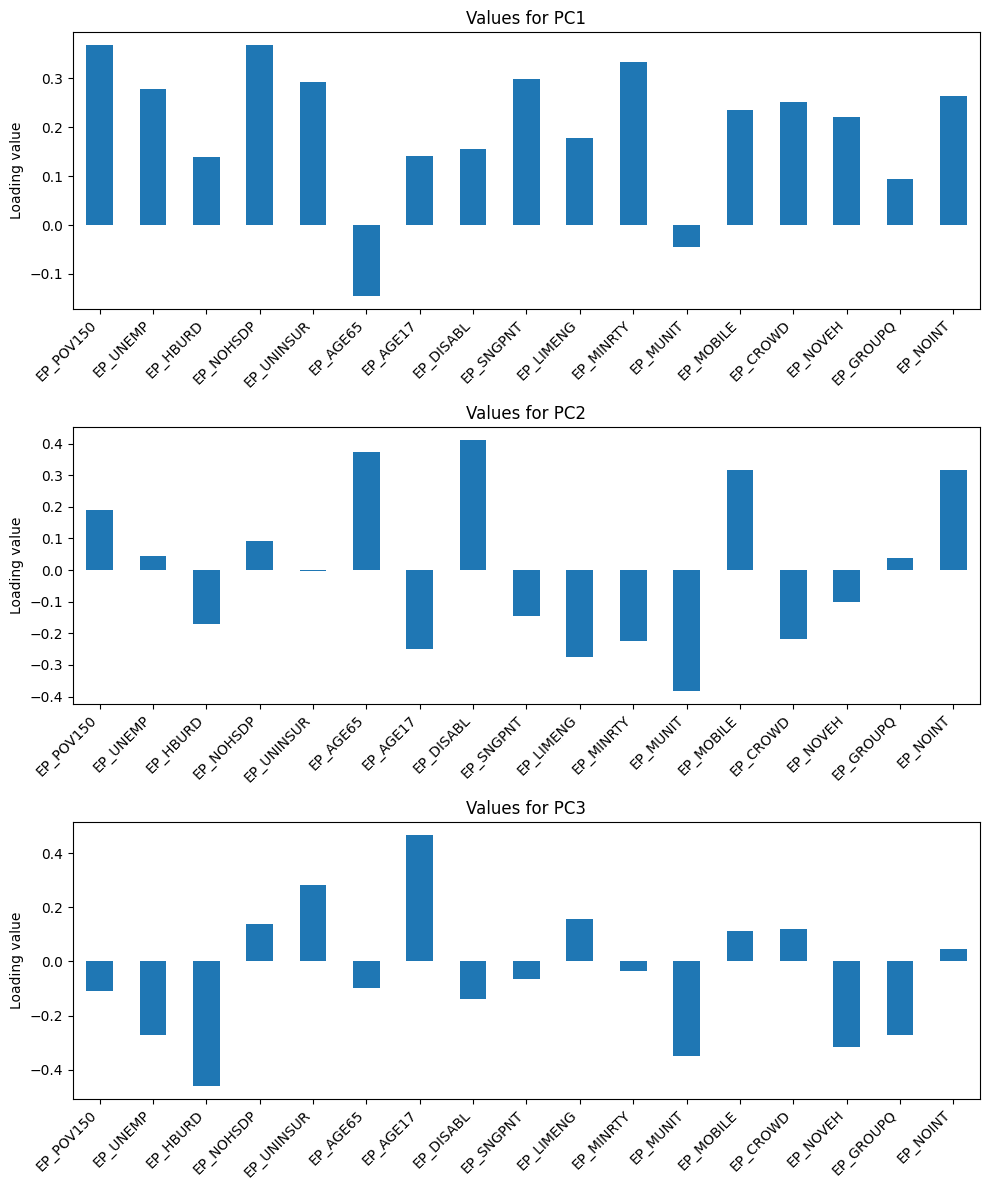

In [106]:
#PLOTTING
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, pc in enumerate(["PC1", "PC2", "PC3"]):
    eig[pc].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Values for {pc}")
    axes[i].set_ylabel("Loading value")
    axes[i].set_xticklabels(eig.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [107]:
# EXAMINING EXPLAINED VARIANCE
pca_full = PCA()
pca_full.fit(df_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
N_comp_80 = np.argmax(cum_var >= 0.80) + 1
N_comp_90 = np.argmax(cum_var >= 90)
cum_var

array([0.28225876, 0.4739652 , 0.5822437 , 0.6502753 , 0.70956421,
       0.76676665, 0.80321315, 0.83746826, 0.86699189, 0.89324414,
       0.9178372 , 0.93921462, 0.95622191, 0.9706734 , 0.98228445,
       0.99164404, 1.        ])

You need 7 PCs to explain 80% variance, and 11 to explain 90%.

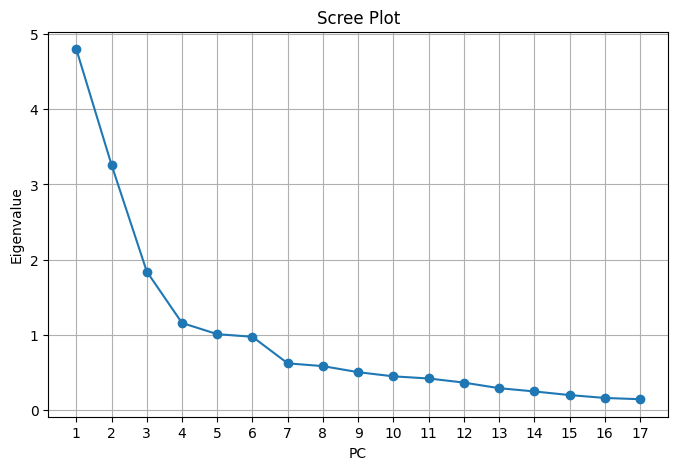

In [108]:
#EXPLAINED VARIANCE PLOT
scree = pca_full.explained_variance_ 
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(scree) + 1), scree, marker='o')
plt.title("Scree Plot")
plt.xlabel("PC")
plt.ylabel("Eigenvalue")
plt.xticks(np.arange(1, len(scree) + 1))
plt.grid(True)
plt.show()

I would include 4 or 5 principle components, since that captures the largest gains before the elbow

In [109]:
pca_df = pd.DataFrame(data=principal_components,columns=['PC1', 'PC2','PC3'])
pca_df['FIPS'] = SVI_data0['FIPS']

In [110]:
import geopandas as gpd
counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip")
counties =  counties.merge(pca_df,left_on='GEOID',right_on='FIPS')

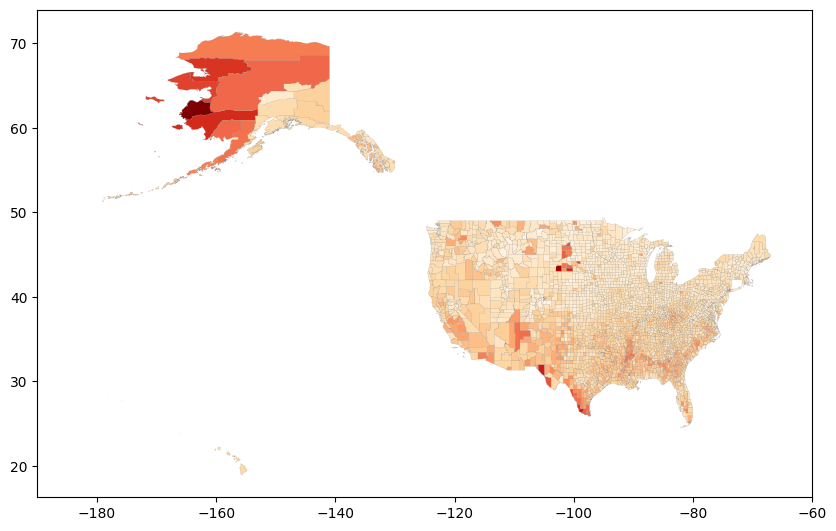

In [111]:
fig, ax = plt.subplots(figsize=(10,10))
counties.plot(column='PC1', cmap='OrRd', linewidth=0.1, ax=ax, edgecolor='gray', legend=False)
plt.tight_layout
plt.xlim(-190,-60)
plt.show()

It appears to be higher along the Southern boarder, and in Alaska. With a pocket of red in the Midwest.